# Microlensing GIF

Notebook in Python 3 to create an animated gif of light curves from microlensing events of pontual sources by a pontual lens.

*By: Giulya Souza - IF/UFRJ, Brazil.*

*giulyasouzadossantos@gmail.com*

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import os

In [2]:
#magnification function for pontual lens & source
@np.vectorize
def magnification_pontualsource(u):
    u = np.abs(u)
    return (u**2 + 2)/(u*np.sqrt(u**2 + 4))

#source in uniform motion relative to the lens
def source_position(umin, t):
    return np.sqrt(umin**2 + t**2)

Test cell:

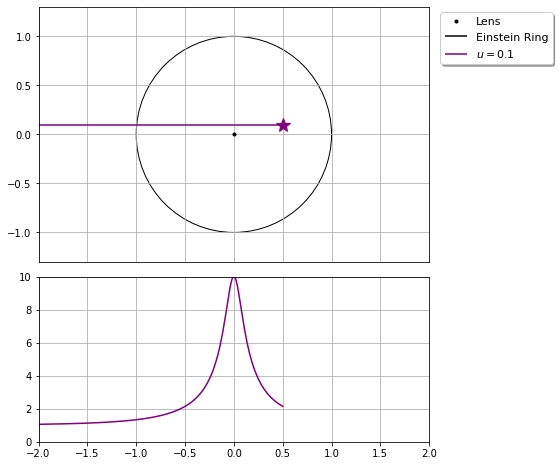

In [4]:
#example parameters

umin = [0.7, 0.5, 0.3, 0.1, 0]
xmin = -2 #start point
xmax = 0.5 #end point
X = np.linspace(xmin, xmax, 200)

einstein_ring = plt.Circle((0, 0), 1, color='black', fill=False) #unitary circle centered at the origin

color = ['blue', 'orange', 'green', 'purple', 'red']

#------------------------- PLOT --------------------------------

fig = plt.subplots(figsize=(7,8))
plot1 = plt.subplot2grid((5,3), (0,0), colspan=3, rowspan=3) #source position in the lens plan 
plot2 = plt.subplot2grid((5,3), (3,0), colspan=3, rowspan=2) #light curve

plot1.add_patch(einstein_ring)
plot1.hlines(-7, -8, -7, color='black', label='Einstein Ring')
plot1.plot([0], [0],'.', color='black', label='Lens')
plot1.plot([xmax], [umin[3]],"*", color=color[3], markersize = 15)
plot1.hlines(umin[3], xmin, xmax, color=color[3], label=r'$u = {}$'.format(umin[3]))
plot1.legend(fancybox=True, shadow=True, fontsize=11, loc='upper right', bbox_to_anchor=(1.33,1))
plot1.grid(True)
plot1.set_ylim([-1.3,1.3])
plot1.set_xlim([-2,2])
plot1.tick_params(axis='x', colors='None')
#------------------
plot2.plot(X,  magnification_pontualsource(source_position(umin[3], X)), color=color[3])
plot2.grid(True)
plot2.set_ylim([0,10])
plot2.set_xlim([-2,2])

plt.show()

Creating the frames of the GIF:

In [ ]:
#defaut parameters
umin = [1, 0.7, 0.3, 0.1, 0]
xmin = -2
xmax = -2
i=0

color = ['blue', 'orange', 'green', 'purple', 'red']

#frame creation loop
while xmax<=2:

    X = np.linspace(xmin, xmax, 200)
    
    einstein_ring = plt.Circle((0, 0), 1, color='black', fill=False)
        
    fig = plt.subplots(figsize=(7,8))
    plot1 = plt.subplot2grid((5,3), (0,0), colspan=3, rowspan=3)
    plot2 = plt.subplot2grid((5,3), (3,0), colspan=3, rowspan=2)
    #-----------------
    plot1.add_patch(einstein_ring)
    plot1.hlines(-7, -8, -7, color='black', label='Einstein Ring')
    plot1.plot([0], [0],'.', color='black', label='Lens')
    plot1.plot([xmax], [umin[0]],"*", color=color[0], markersize = 15)
    plot1.hlines(umin[0], xmin, xmax, color=color[0], label=r'$u = {}$'.format(umin[0]))
    plot1.plot([xmax], [umin[1]],"*", color=color[1], markersize = 15)
    plot1.hlines(umin[1], xmin, xmax, color=color[1], label=r'$u = {}$'.format(umin[1]))
    plot1.plot([xmax], [umin[2]],"*", color=color[2], markersize = 15)
    plot1.hlines(umin[2], xmin, xmax, color=color[2], label=r'$u = {}$'.format(umin[2]))
    plot1.plot([xmax], [umin[3]],"*", color=color[3], markersize = 15)
    plot1.hlines(umin[3], xmin, xmax, color=color[3], label=r'$u = {}$'.format(umin[3]))
    plot1.plot([xmax], [umin[4]],"*", color=color[4], markersize = 15)
    plot1.hlines(umin[4], xmin, xmax, color=color[4], label=r'$u = {}$'.format(umin[4]))
    plot1.legend(fancybox=True, shadow=True, fontsize=11, loc='upper right', bbox_to_anchor=(1.33,1))
    plot1.grid(True)
    plot1.set_ylim([-1.3,1.3])
    plot1.set_xlim([-2,2])
    plot1.tick_params(axis='x', colors='None')
    #------------------
    plot2.plot(X,  magnification_pontualsource(source_position(umin[0], X)), color=color[0])
    plot2.plot(X,  magnification_pontualsource(source_position(umin[1], X)), color=color[1])
    plot2.plot(X,  magnification_pontualsource(source_position(umin[2], X)), color=color[2])
    plot2.plot(X,  magnification_pontualsource(source_position(umin[3], X)), color=color[3])
    plot2.plot(X,  magnification_pontualsource(source_position(umin[4], X)), color=color[4])
    plot2.grid(True)
    plot2.set_ylim([0,12])
    plot2.set_xlim([-2,2])

    #-------------------
    if i<10:
        savename='gifframe0'+str(i)+'.png'
    else:
        savename='gifframe'+str(i)+'.png'

    #all frames will be saved in the same directory as the notebook    
    plt.savefig(savename, bbox_inches='tight', dpi=90)

    xmax+=0.1
    i+=1

Compiling the frames in a video to generate the GIF:

*Please make the necessary changes in the next cell to indicate the correct path to the directory where your frames are located*

In [ ]:
#before creating the video I moved all the frames to an empty directory called 'gifframes'

import imageio

video = []

for frame in os.listdir("/home/giulyasouza/ic-microlensing/gifframes/"):
    path="/home/giulyasouza/ic-microlensing/gifframes/"+frame
    video.append(imageio.imread(path))

imageio.mimsave('/home/giulyasouza/ic-microlensing/gifframes/VIDEOMICROLENSING.gif', video)